In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Freedom in the World 2013 - 2021 EDA
dataset is available from https://freedomhouse.org/report/freedom-world

In [2]:
# Read country data from excel file
excel_filename = 'All_data_FIW_2013-2021.xlsx'
fiw = pd.read_excel(
        excel_filename,
        sheet_name=1,
        header=1,
        usecols='A:G, W, AQ, AR')
fiw.head()
# Remove territories from dataset
countries = fiw[fiw['C/T'] == 'c']
countries = countries.drop('C/T', axis=1)
countries = countries.rename(
        columns={'Country/Territory': 'Country', 'Edition': 'Year'})
countries.head()

,Country,Region,Year,Status,PR rating,CL rating,PR,CL,Total
1,Afghanistan,Asia,2021,NF,5,6,13,14,27
2,Albania,Europe,2021,PF,3,3,27,39,66
3,Algeria,MENA,2021,NF,6,5,10,22,32
4,Andorra,Europe,2021,F,1,1,38,55,93
5,Angola,SSA,2021,NF,6,5,10,21,31


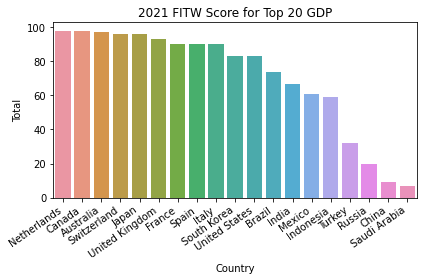

In [3]:
# Bar graph of all counties in 2021
# TODO change to line graph over time
plt.figure()
highest_gdp = [
        'United States', 'China', 'Japan', 'United Kingdom', 'India',
        'France', 'Italy', 'Canada', 'South Korea', 'Russia', 'Brazil',
        'Australia', 'Spain', 'Indonesia', 'Mexico', 'Netherlands',
        'Switzerland', 'Saudi Arabia', 'Turkey']
scores = countries[countries['Year'] == 2021]
scores = scores[scores['Country'].isin(highest_gdp)]
scores = scores.sort_values(
        by='Total',
        axis=0,
        ascending=False)
g = sns.barplot(
        x='Country',
        y='Total',
        data=scores)
g.set_title('2021 FITW Score for Top 20 GDP')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.savefig('images/country_scores_by_gdp.png')

<Figure size 432x288 with 0 Axes>

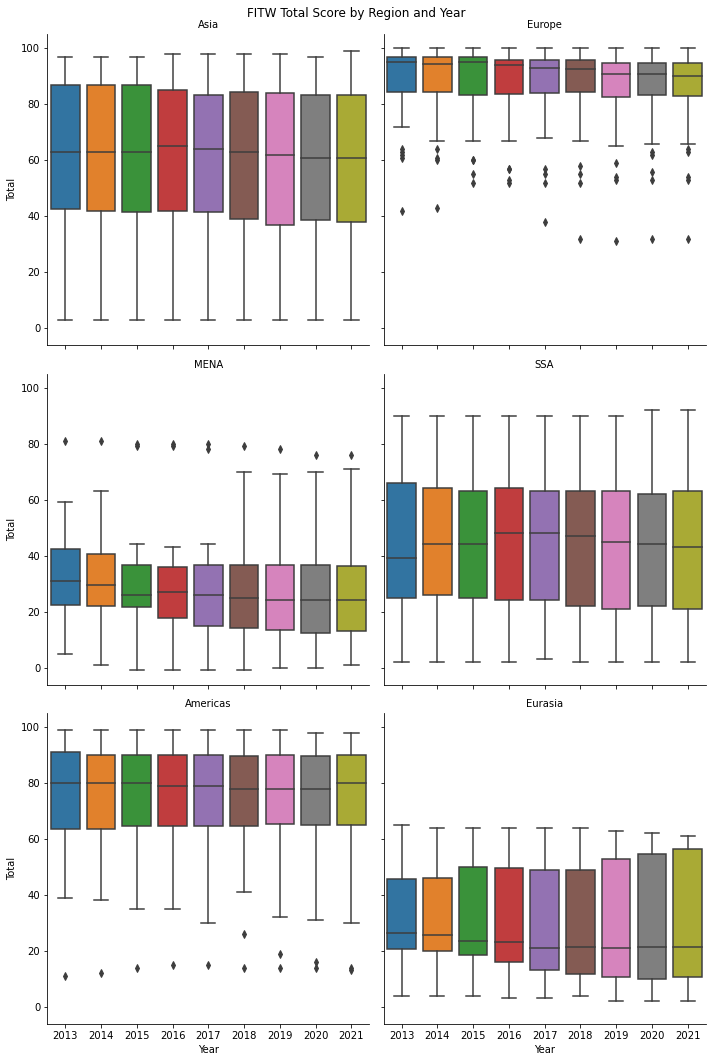

In [4]:
# voilin plot showing the change in distribution by year
plt.figure()
g = sns.catplot(
        x='Year',
        y='Total',
        data=countries,
        kind='box',
        col='Region',
        col_wrap=2)
g.set_titles('{col_name}')
g.fig.suptitle('FITW Total Score by Region and Year')
plt.tight_layout()
plt.savefig('images/scores_by_year_voilin_plot.png')

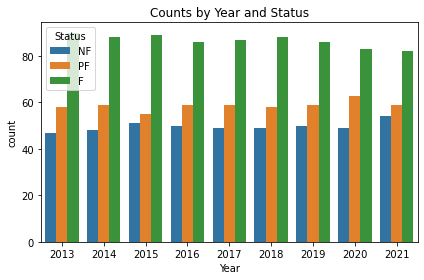

In [5]:
# barplot time vs status
plt.figure()
g = sns.countplot(x='Year', hue='Status', data=countries)
g.set_title('Counts by Year and Status')
plt.savefig('images/counts_by_year_and_status.png')
plt.tight_layout()

In [6]:
# region vs year vs total

In [7]:
# PR vs CL dot plot with histograms on the sides

In [8]:
# PR vs CL diagonal corrolation matrix

In [9]:
# counties vs PR vs CL violin plot

In [10]:
# linegraph with biggest economies (country by time)

In [11]:
# 2d historgram of counties by time

In [12]:
# avg scores vs time

In [13]:
# most improved

In [14]:
# most unimproved
